In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Mobile Banking Prediction Challenge

### Objective
The objective is to identify if a client from banks and financial service provider  will use mobile or internet banking and which patterns may lead to such a decision.


### Hypothesis
- Older people tend to use more mobile banking than internet banking
- People with mobile phones tend use more mobile money services
- Large group of people who own bank account tend to use internet banking
- Most of self employed people or unemployed people tend to use mobile money service
- People who frequently pay for expenses such as Electricity and water tend to use more mobile money service


In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data.shape

(108446, 42)

In [4]:
data.describe()

country_code         region            age            FQ1  \
count  108446.000000  108446.000000  108124.000000  108446.000000   
mean       68.544953       2.894242      41.857395       1.563294   
std        41.529264       2.286505      17.876105       0.530077   
min         0.000000      -1.000000      15.000000       1.000000   
25%        33.000000       1.000000      27.000000       1.000000   
50%        65.000000       3.000000      39.000000       2.000000   
75%       105.000000       4.000000      55.000000       2.000000   
max       143.000000       7.000000      99.000000       4.000000   

                FQ2           FQ3            FQ4           FQ5           FQ6  \
count  49124.000000  46218.000000  108446.000000  21185.000000  60659.000000   
mean       1.063716      1.299710       1.824622      1.160113      1.223907   
std        0.288075      0.468503       0.435942      0.383827      0.450140   
min        1.000000      1.000000       1.000000      1.000000      1.000000   
25%        1.000000      1.000000       2.000000      1.000000      1.000000   
50%        1.000000      1.000000       2.000000      1.000000      1.000000   
75%        1.000000      2.000000       2.000000      1.000000      1.000000   
max        4.000000      4.000000       4.000000      4.000000      4.000000   

                FQ7  ...         FQ27         FQ28          FQ29         FQ30  \
count  60620.000000  ...  3200.000000  1506.000000  83912.000000  2115.000000   
mean       1.206961  ...     1.578125     1.351262      1.860330     1.615130   
std        0.440780  ...     0.563689     0.493938      0.382599     0.548808   
min        1.000000  ...     1.000000     1.000000      1.000000     1.000000   
25%        1.000000  ...     1.000000     1.000000      2.000000     1.000000   
50%        1.000000  ...     2.000000     1.000000      2.000000     2.000000   
75%        1.000000  ...     2.000000     2.000000      2.000000     2.000000   
max        4.000000  ...     4.000000     4.000000      4.000000     4.000000   

             FQ31          FQ32           FQ33          FQ34           FQ37  \
count  869.000000  60796.000000  108444.000000  76652.000000  108446.000000   
mean     1.436133      1.854744       1.178479      1.127511       0.631457   
std      0.557423      0.401499       0.398819      0.350632       0.482412   
min      1.000000      1.000000       1.000000      1.000000       0.000000   
25%      1.000000      2.000000       1.000000      1.000000       0.000000   
50%      1.000000      2.000000       1.000000      1.000000       1.000000   
75%      2.000000      2.000000       1.000000      1.000000       1.000000   
max      4.000000      4.000000       4.000000      4.000000       1.000000   

              Target  
count  108446.000000  
mean        0.273970  
std         0.445996  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  

[8 rows x 41 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [6]:
data.head()

ID  country_code  region   age  FQ1  FQ2  FQ3  FQ4  FQ5  FQ6  ...  \
0  ID_000J8GTZ             1       6  35.0    2  NaN  NaN    2  NaN  NaN  ...   
1  ID_000QLXZM            32       7  70.0    2  NaN  NaN    2  NaN  NaN  ...   
2  ID_001728I2            71       7  22.0    2  1.0  NaN    2  NaN  NaN  ...   
3  ID_001R7IDN            48       3  27.0    1  NaN  NaN    2  NaN  2.0  ...   
4  ID_0029QKF8            25       0  79.0    2  NaN  NaN    2  NaN  NaN  ...   

   FQ27  FQ28  FQ29  FQ30  FQ31  FQ32  FQ33  FQ34  FQ37  Target  
0   NaN   NaN   1.0   NaN   NaN   NaN   1.0   1.0     0       0  
1   NaN   NaN   2.0   NaN   NaN   NaN   1.0   2.0     0       0  
2   NaN   NaN   2.0   NaN   NaN   NaN   2.0   1.0     1       0  
3   NaN   NaN   NaN   NaN   NaN   2.0   1.0   1.0     1       0  
4   NaN   NaN   2.0   NaN   NaN   2.0   1.0   1.0     1       0  

[5 rows x 42 columns]

In [7]:
data.dtypes

ID               object
country_code      int64
region            int64
age             float64
FQ1               int64
FQ2             float64
FQ3             float64
FQ4               int64
FQ5             float64
FQ6             float64
FQ7             float64
FQ8               int64
FQ9               int64
FQ10              int64
FQ11            float64
FQ12              int64
FQ13              int64
FQ14              int64
FQ15              int64
FQ16              int64
FQ17            float64
FQ18              int64
FQ19            float64
FQ20            float64
FQ21            float64
FQ22              int64
FQ23              int64
FQ24            float64
FQ35            float64
FQ36            float64
FQ25              int64
FQ26              int64
FQ27            float64
FQ28            float64
FQ29            float64
FQ30            float64
FQ31            float64
FQ32            float64
FQ33            float64
FQ34            float64
FQ37              int64
Target          

In [8]:
data.isna().sum()

ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59322
FQ3              62228
FQ4                  0
FQ5              87261
FQ6              47787
FQ7              47826
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24570
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97099
FQ18                 0
FQ19             47407
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70014
FQ35             82557
FQ36             96963
FQ25                 0
FQ26                 0
FQ27            105246
FQ28            106940
FQ29             24534
FQ30            106331
FQ31            107577
FQ32             47650
FQ33                 2
FQ34             31794
FQ37                 0
Target               0
dtype: int64

In [9]:
data.isna().sum().sum()

1302744

In [10]:
data.columns

Index(['ID', 'country_code', 'region', 'age', 'FQ1', 'FQ2', 'FQ3', 'FQ4',
       'FQ5', 'FQ6', 'FQ7', 'FQ8', 'FQ9', 'FQ10', 'FQ11', 'FQ12', 'FQ13',
       'FQ14', 'FQ15', 'FQ16', 'FQ17', 'FQ18', 'FQ19', 'FQ20', 'FQ21', 'FQ22',
       'FQ23', 'FQ24', 'FQ35', 'FQ36', 'FQ25', 'FQ26', 'FQ27', 'FQ28', 'FQ29',
       'FQ30', 'FQ31', 'FQ32', 'FQ33', 'FQ34', 'FQ37', 'Target'],
      dtype='object')

In [11]:
import pandas_profiling

### Univariate Analysis

In [12]:
eda_report = pandas_profiling.ProfileReport(data)

In [13]:
eda_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#redraw country code,region,age

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

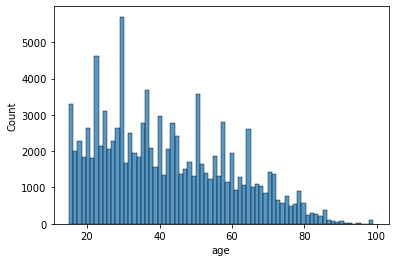

In [21]:
sns.histplot(data['age'],)

<AxesSubplot:xlabel='region', ylabel='count'>

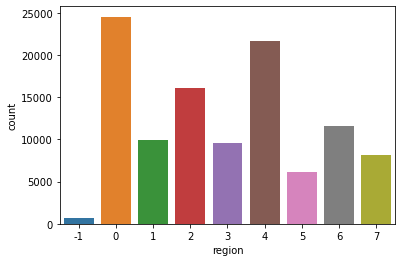

In [17]:
sns.countplot(x=data['region'])

<AxesSubplot:xlabel='country_code', ylabel='Count'>

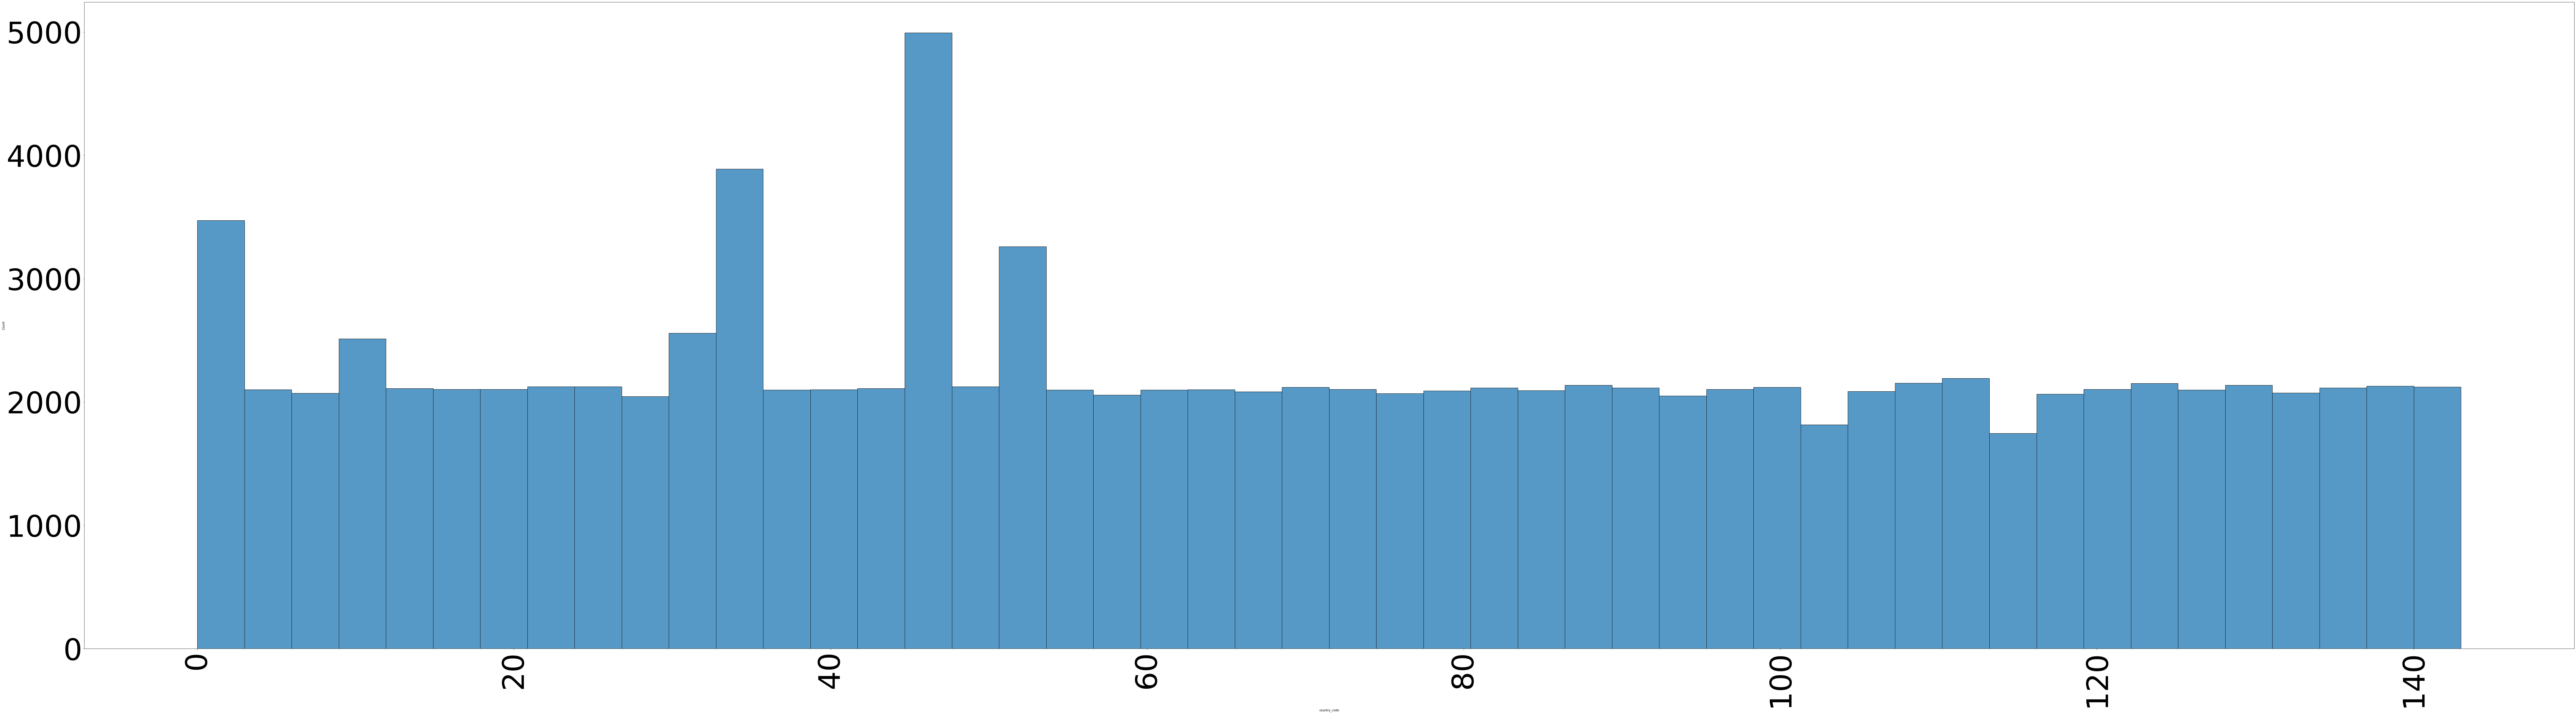

In [18]:
plt.figure(figsize=(150,40))
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=100)
sns.histplot(x=data['country_code'])

#### In our data the highest count is from country_code 45

### Bivarient Analysis

### X axis values
- 1 yes
- 2 no
- 3 Dont know
- 4 refused to answer

### Y axis values
- 0 unknown
- 1 unknown

In [22]:
labels = pd.read_csv('VariableDefinitions.csv')

Has ATM/debit card


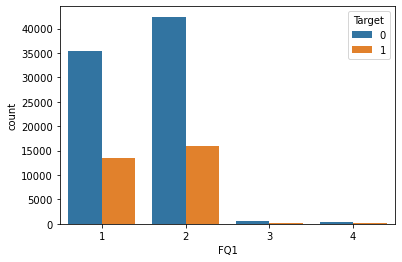

Is the ATM connected to an account with your name?


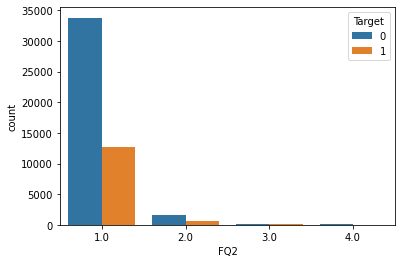

Purchased with the ATM


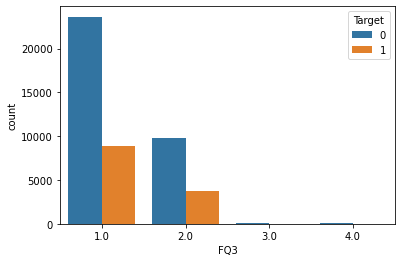

Has a credit card


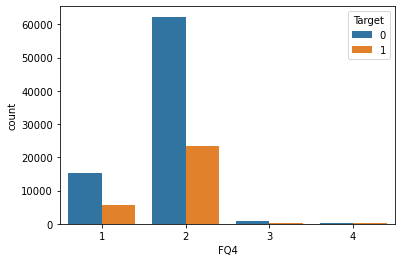

Used the credit card in 12 months


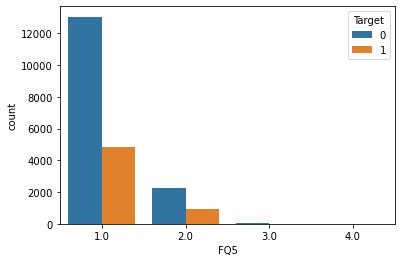

Money deposits to a bank account in the last 12 months


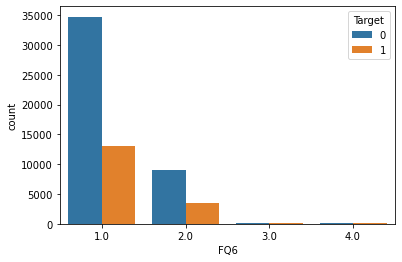

Money withdrawals from a bank account in the last 12 months


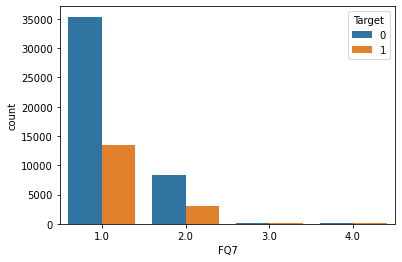

Savings in the last 12 months to start a business/farm


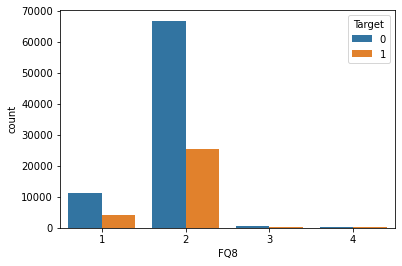

Savings in the last 12 months for old age


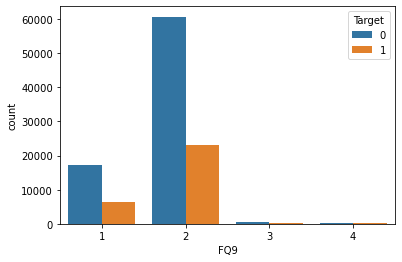

Saved the money at a bank/financial institutions


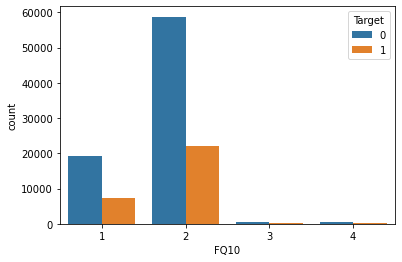

Save the money at groups/clubs of any informal type


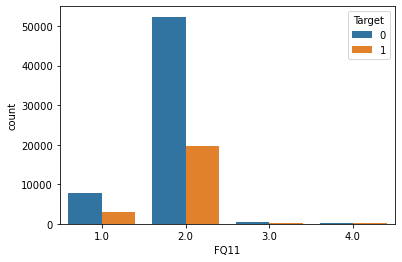

Has a loan from formal financial institutions to purchase land, home, or apartment


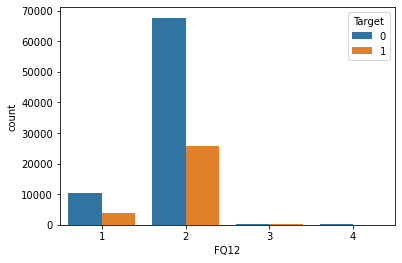

Borrowed money for health/medical purposes in the last 12 months


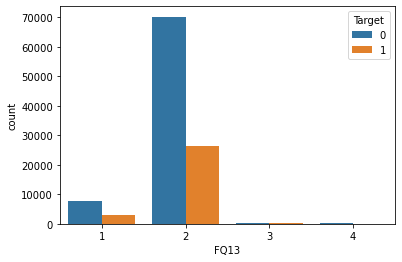

Borrowed money to start/grow business or farm


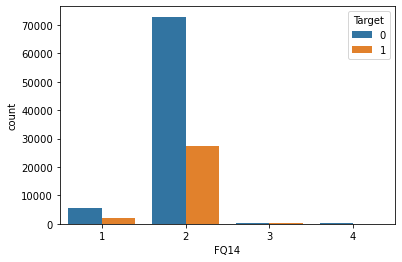

Borrowed money from formal financial institutions - 12 months


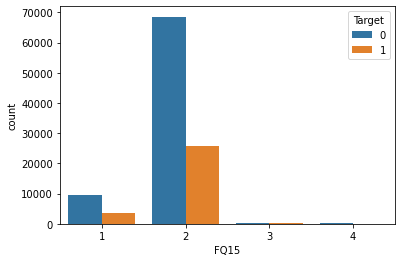

Borrowed money from friends, relatives, or family - 12 months


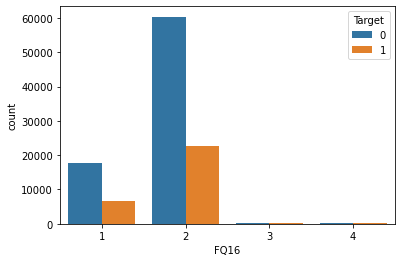

Borrowed money from an informal saving. I.e group or club


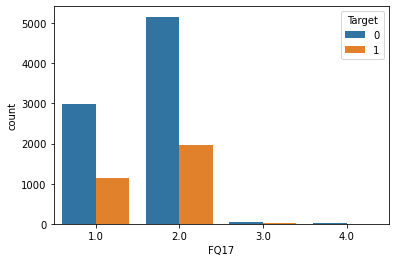

What is the possibility of coming up with 1/20 of per capita in 1 month


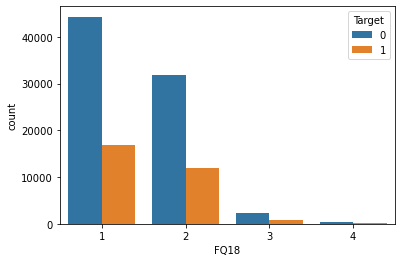

Source of money for FQ18


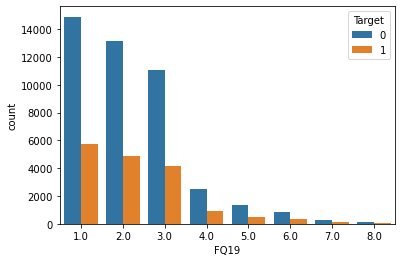

Sent/given money to friend/relative


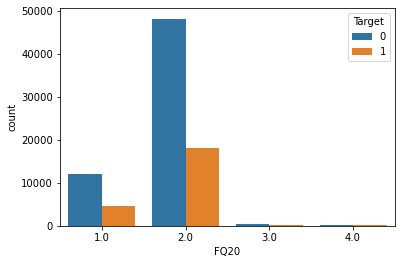

Received money from friend or relative


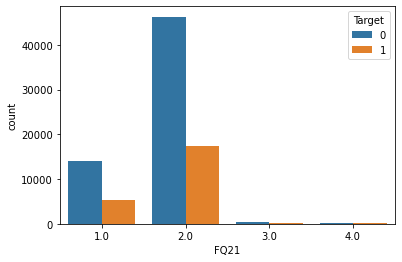

Payments for electricity, water, or trash in the last 12 months


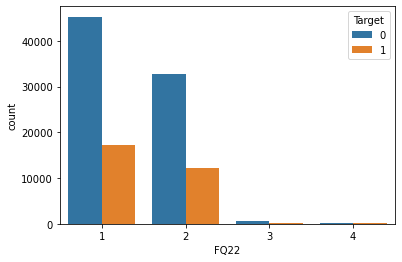

salary/wages in the last 12 months


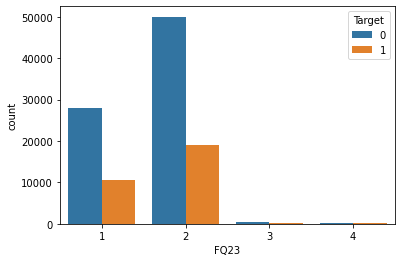

Employed by government or public sector -12 months


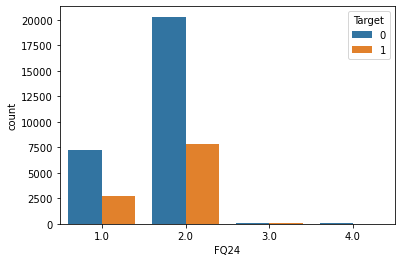

Was the a/c you received money from your employer your first?


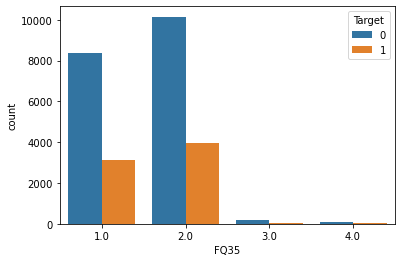

Did you open the a/c to receive the money in FQ36


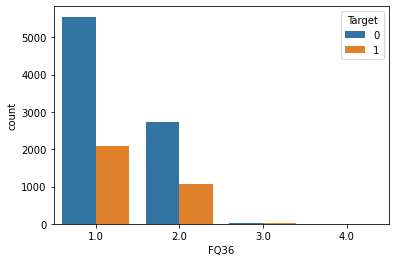

Received any form of financial support from the government


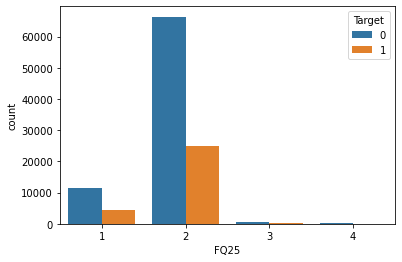

Pension in the last 12 months


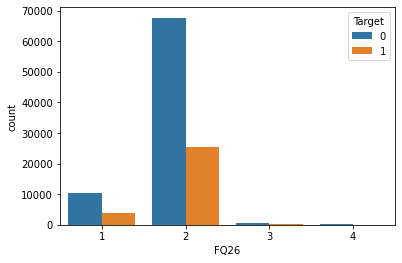

Was the a/c you received money from the government your first?


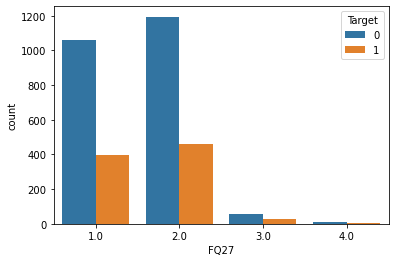

Did you open the a/c to receive payments from the government


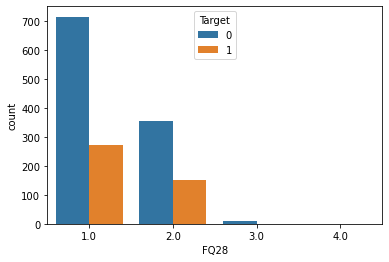

Received money for the sale of livestock, agricultural products, crops, produce? (12 months)


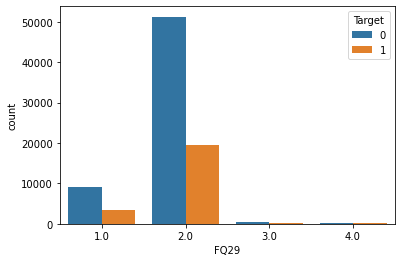

Was this your first a/c for transaction in FQ29


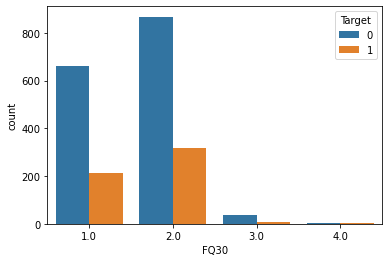

Did you open the a/c to receive payments in FQ29


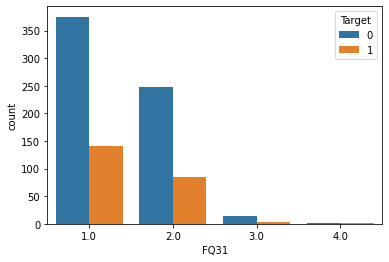

Received money from your business in last 12 months


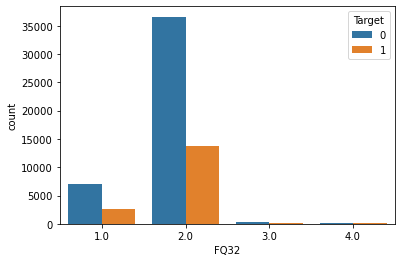

Owns a mobile phone


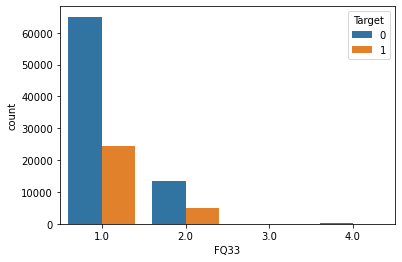

Has national ID card


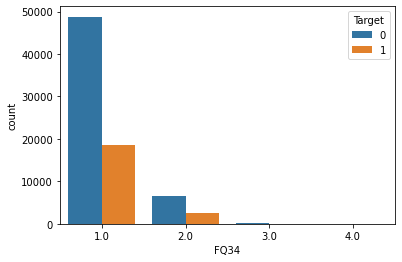

Owns a bank a/c


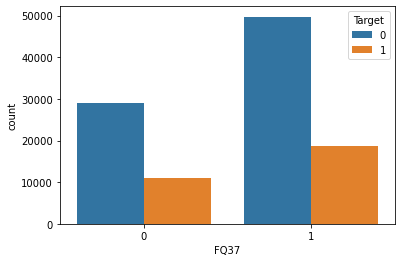

Determine whether one has used mobile or internet banking.


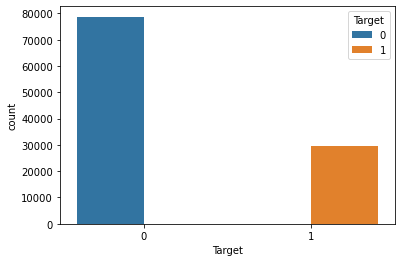

In [24]:
for column in data.columns:
    if column not in ['country_code','age','region','ID']:
        plt.figure()
        val=labels[labels['ID'] == column ]
        print(val['Person unique/random identification'].values[0])
        sns.countplot(data[column],hue=data['Target'],)
        plt.show()
       

In [39]:
data['Target'] = data['Target'].astype('category')

### Comment and Conclusion
- The dataset doesnot contain clear description of the features and target columns in data, hence our exploratory data analysis was not deep and we were not able to come up with a conclusion to our hypothesis

### Variable definition
- FQ1 Has ATM/debit card
- FQ2	Is the ATM connected to an account with your name?
- FQ3	Purchased with the ATM
- FQ4	Has a credit card
- FQ5	Used the credit card in 12 months
- FQ6	Money deposits to a bank account in the last 12 months
- FQ7	Money withdrawals from a bank account in the last 12 months
- FQ7	Savings in the last 12 months to start a business/farm
- FQ9	Savings in the last 12 months for old age
- FQ10	Saved the money at a bank/financial institutions
- FQ11	Save the money at groups/clubs of any informal type
- FQ12	Has a loan from formal financial institutions to purchase land, home, or apartment
-  FQ13	Borrowed money for health/medical purposes in the last 12 months
-   FQ14	Borrowed money to start/grow business or farm
-   FQ15	Borrowed money from formal financial institutions - 12 months
-   FQ16	Borrowed money from friends, relatives, or family - 12 months
-   FQ17	Borrowed money from an informal saving. I.e group or club
-   FQ18	What is the possibility of coming up with 1/20 of per capita in 1 month
-   FQ19	Source of money for FQ18
-   FQ20	Sent/given money to friend/relative
-   FQ21	Received money from friend or relative
-   FQ22	Payments for electricity, water, or trash in the last 12 months
-   FQ23	salary/wages in the last 12 months
-   FQ24	Employed by government or public sector -12 months
-   FQ25	Received any form of financial support from the government
-   FQ26	Pension in the last 12 months
-   FQ27	Was the a/c you received money from the government your first?
-   FQ28	Did you open the a/c to receive payments from the government
-   FQ29	Received money for the sale of livestock, agricultural products, crops, produce? (12 months)
-   FQ30	Was this your first a/c for transaction in FQ29
-   FQ31	Did you open the a/c to receive payments in FQ29
-   FQ32	Received money from your business in last 12 months
-   FQ33	Owns a mobile phone
-   FQ34	Has national ID card
-   FQ3    Was the a/c you received money from your employer your first?
-   FQ36	Did you open the a/c to receive the money in FQ36
-   FQ37	Owns a bank a/c
-   Target	Determine whether one has used mobile or internet banking.
